#### Note: This Case study steps can be appiled to 90% of NLP projects

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.duplicated().sum()

418

In [9]:
df = df.drop_duplicates()

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
df = df.iloc[:10000]

In [13]:
df.shape

(10000, 2)

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Cleaning Steps

In [16]:
#lower case
df['review'] = df['review'].str.lower()

In [19]:
#remove white spaces
df['review'] = df['review'].str.strip()

In [24]:
#removing html tags
df['review'] = df['review'].str.replace(r'<.*?>','',regex=True)

In [26]:
# code to check if a review contains an URL
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[4].values

array(["this show has to be my favorite out of all the 80's horror tv shows. like tales from the darkside, also from the same creators, this show is a rare gem. if you agree with me, please sign this petition i started, to get the word out for monsters and get it out on dvd. here is the petition address: www.petitiononline.com/19784444/petition.html some of my favorite episodes would have to be glim glim, and rain dance. i also loved the opening intro with the monster family. that used to creep me out! one of the things i would have to ask the dvd creators to include would be the organ sound heard right before where the commercial break would be. i don't know if any of you remember that part but that's one of the main things that brings back memories to me. i mean, come on! war of the worlds the tv series already has been released on dvd, so i say monsters, and also tales from the darkside, and friday the 13th the series should be released too! we the fans need to speak our minds! we n

In [29]:
# code to remove a URL
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'',regex=True)

In [30]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [32]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [34]:
import re

In [35]:
#Expanding abbreviation
df['review'] = df['review'].apply(remove_abb)

In [36]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

In [38]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00


DEPRECATION: dropbox 11.36.0 has a non-standard dependency specifier stone>=2.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of dropbox or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
#Spelling Correction
from textblob import TextBlob

text = "hi I can drve at nigt"
TextBlob(text).correct().string

'hi I can drove at night'

In [ ]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [ ]:
df['review'].apply(spelling_correction)

In [40]:
#Punctuation
import string

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def remove_puctuation(text):
    
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
            
    return text

In [43]:
df['review'] = df['review'].apply(remove_puctuation)
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

### Preprocessing Steps

In [48]:
#Tokenization: eg: I am vedant -> [I, am, vedant]

from nltk.tokenize import word_tokenize

In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vedant\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [49]:
df['tokenized_review'] = df['review'].apply(word_tokenize)

In [50]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [55]:
#Removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vedant\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
def remove_stopwords(text):
    
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
            
    return L

In [57]:
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

In [58]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [59]:
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))

In [60]:
df.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [61]:
df['char_length'] = df['review'].str.len()

In [62]:
df['word_length'] = df['tokenized_review'].apply(len)

In [63]:
df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


In [64]:
import seaborn as sns

C:\Users\Vedant\AppData\Local\Temp\ipykernel_4052\669209998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

<Axes: xlabel='char_length', ylabel='Density'>

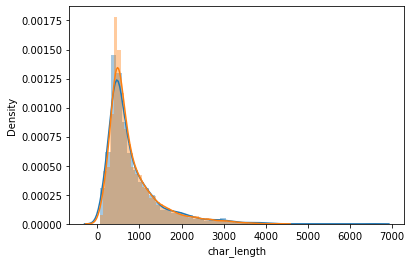

In [65]:
sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
sns.distplot(df[df['sentiment'] == 'negative']['char_length'])

C:\Users\Vedant\AppData\Local\Temp\ipykernel_4052\3480675452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_in

<Axes: xlabel='word_length', ylabel='Density'>

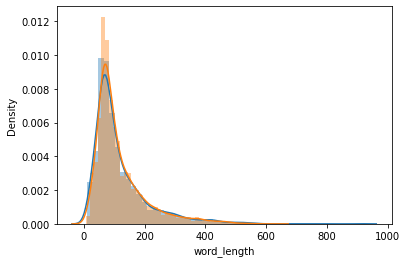

In [66]:
sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
sns.distplot(df[df['sentiment'] == 'negative']['word_length'])

In [67]:
df['tokenized_review'].sum()

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go

In [69]:
from nltk import ngrams

pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

(I, would)                492
(ever, seen)              459
(special, effects)        438
(I, seen)                 429
(even, though)            372
                         ... 
(liven, party)              1
(party, upwith)             1
(upwith, absolutely)        1
(connection, original)      1
(hurt, yet)                 1
Name: count, Length: 845130, dtype: int64

In [70]:
pd.Series(ngrams(df['tokenized_review'].sum(),3)).value_counts()

(I, ever, seen)             169
(worst, movie, ever)         69
(movie, ever, seen)          56
(I, would, like)             56
(one, worst, movies)         55
                           ... 
(tedious, four, hours)        1
(four, hours, left)           1
(hours, left, long)           1
(left, long, succession)      1
(head, hurt, yet)             1
Name: count, Length: 1149704, dtype: int64

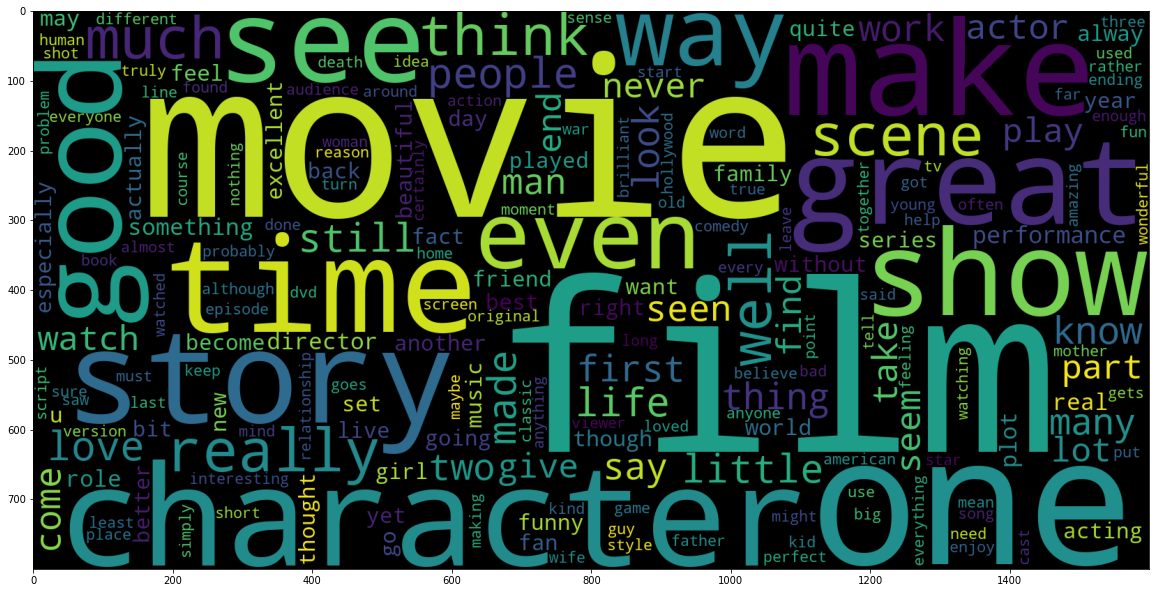

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

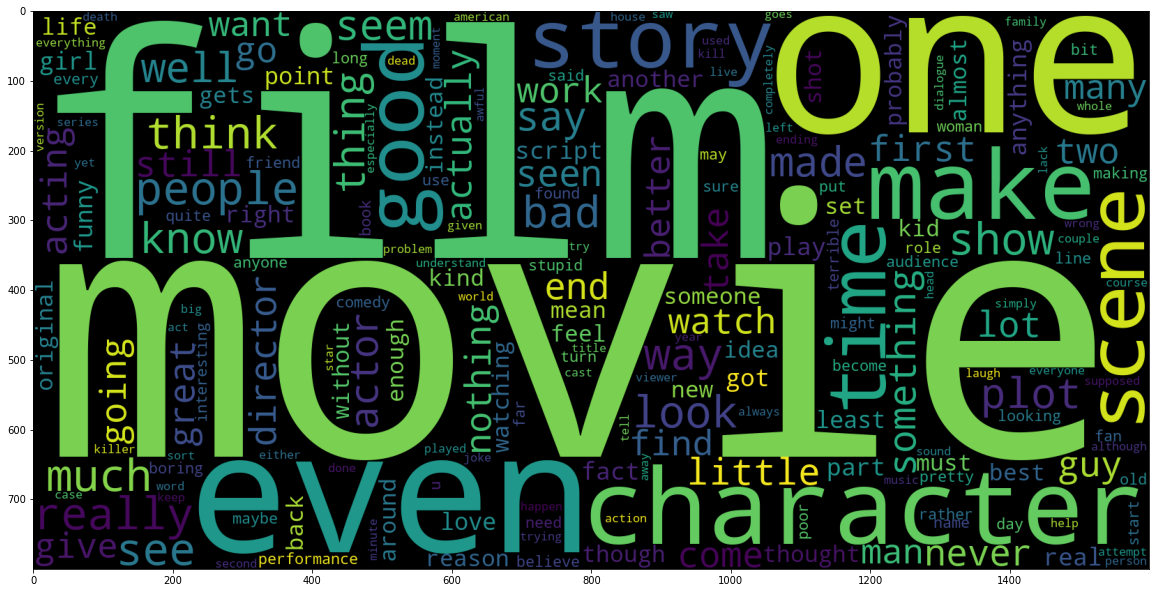

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

In [74]:
# BoW

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [75]:
bag_of_words

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young girl,young man,young people,young woman,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.decomposition import PCA
#PCA used for converting high dimension data into lower dimension data

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [77]:
pca_result.shape

(10000, 2)

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.10\l

<Axes: >

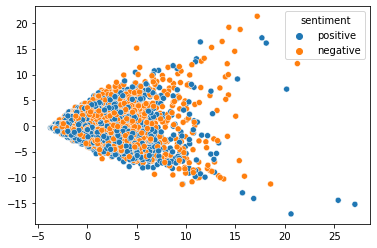

In [79]:
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['sentiment'])